In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Netflix.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [7]:
df.shape

(2500, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [4]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [5]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


Average age is 38 yrs and Average monthly revenue/subscription is 12$ and max is 51$

In [6]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [14]:
df[['Subscription Type','Monthly Revenue']].groupby(df['Subscription Type']).size()

Subscription Type
Basic       999
Premium     733
Standard    768
dtype: int64

Maximum number of Standard Subscription followed by Standard and Premium

In [15]:
average_monthly_revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].mean()
average_monthly_revenue_by_subscription

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64

In [29]:
user_count_by_country = df.groupby('Country')['User ID'].count().reset_index().rename(columns = {'User ID':'Count'})
user_count_by_country

,Country,Count
0,Australia,183
1,Brazil,183
2,Canada,317
3,France,183
4,Germany,183
5,Italy,183
6,Mexico,183
7,Spain,451
8,United Kingdom,183
9,United States,451


Most of the users are from US, followed by Spain and Canada.

In [32]:
median_age_by_plan_duration = df.groupby('Plan Duration')['Age'].median()
median_age_by_plan_duration

Plan Duration
1 Month    39.0
Name: Age, dtype: float64

In [33]:
total_revenue_by_gender = df.groupby('Gender')['Monthly Revenue'].sum()
total_revenue_by_gender

Gender
Female    15736
Male      15535
Name: Monthly Revenue, dtype: int64

Female users are helping in generating more income

In [37]:
df.groupby('Subscription Type')['Age'].mean()

Subscription Type
Basic       38.828829
Premium     38.512960
Standard    39.022135
Name: Age, dtype: float64

In [38]:
df.groupby('Device')['Age'].mean()

Device
Laptop        39.036164
Smart TV      38.693443
Smartphone    38.726248
Tablet        38.720379
Name: Age, dtype: float64

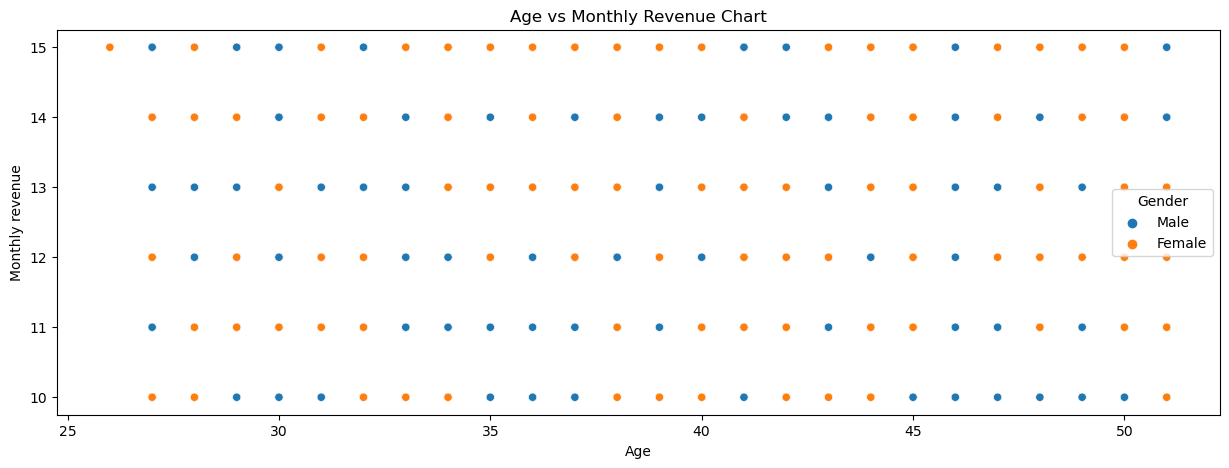

In [42]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Age',y='Monthly Revenue',hue='Gender',data=df)
plt.title('Age vs Monthly Revenue Chart')
plt.xlabel('Age')
plt.ylabel('Monthly revenue')
plt.show()

In [45]:
total_revenue_by_country = df.groupby('Country')['Monthly Revenue'].mean().reset_index()
total_revenue_by_country

,Country,Monthly Revenue
0,Australia,12.409836
1,Brazil,12.486339
2,Canada,12.460568
3,France,12.606557
4,Germany,12.349727
5,Italy,12.661202
6,Mexico,12.224044
7,Spain,12.554324
8,United Kingdom,12.666667
9,United States,12.558758


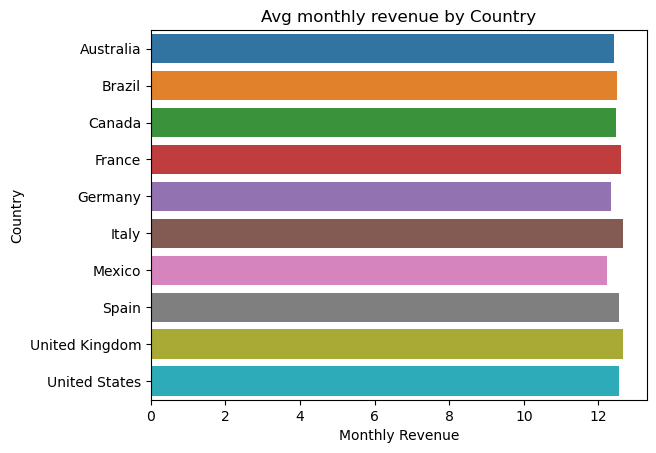

In [52]:
sns.barplot(y='Country',x='Monthly Revenue',data=total_revenue_by_country,orient='h')
plt.title('Avg monthly revenue by Country')
#plt.xticks(rotation = 90)
plt.show()

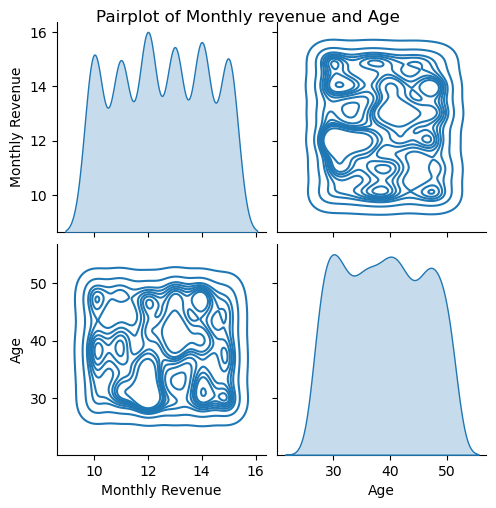

In [57]:
numerical_columns = ['Monthly Revenue','Age']
sns.pairplot(df[numerical_columns],kind='kde')
plt.suptitle('Pairplot of Monthly revenue and Age',y=1)
plt.show()

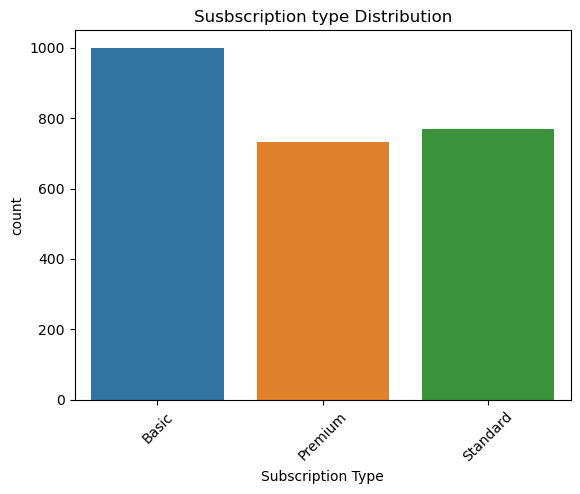

In [60]:
sns.countplot(x='Subscription Type',data=df)
plt.title('Susbscription type Distribution')
plt.xticks(rotation = 45)
plt.show()

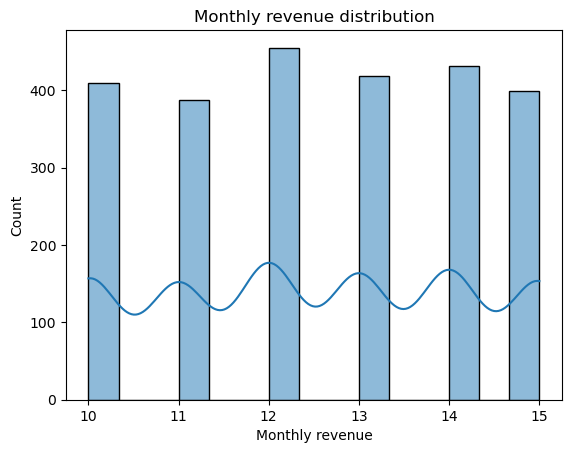

In [62]:
sns.histplot(df['Monthly Revenue'],bins=15,kde=True)
plt.title('Monthly revenue distribution')
plt.xlabel('Monthly revenue')
plt.ylabel('Count')
plt.show()

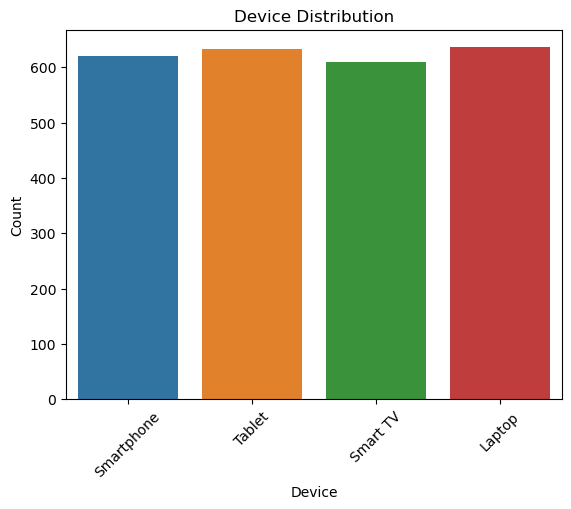

In [64]:
sns.countplot(x='Device',data=df)
plt.title('Device Distribution')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

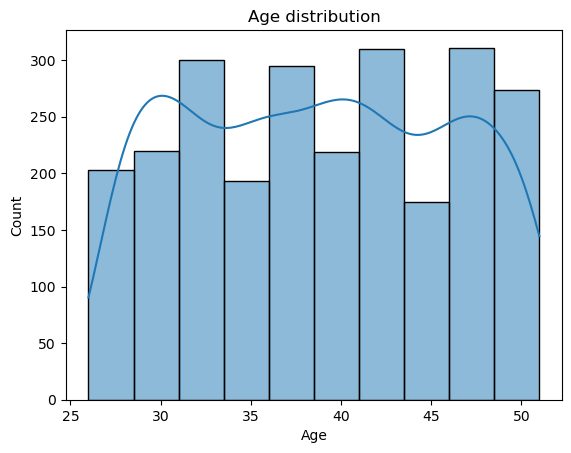

In [68]:
sns.histplot(df['Age'],bins=10,kde=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()